<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")
import src.soporte_preprocesamiento as sp

# Ignoramos los warnings
# -----------------------------------------------------------------------
import warnings
warnings.simplefilter("ignore", FutureWarning)

# SKlearn
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Se utiliza para el iterative
# -----------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

# EDA

In [2]:
# Cargamos el archivo
df = pd.read_csv("../../datos/autorenew.csv")
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,private,offer,2200,test,NaN,2005,NaN,0.0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,private,offer,1199,test,convertible,2000,automatic,100.0,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,offer,9200,test,bus,1996,manually,101.0,transporter,150000,3,diesel,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,private,offer,3400,test,combi,2002,manually,99.0,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [19]:
sp.exploracion_dataframe(df, "price")

El número de datos es 371524 y el de columnas es 21

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
price,2.901024
vehicleType,36.003865
yearOfRegistration,0.048987
gearbox,5.439487
powerCV,10.987177
model,5.513507
monthOfRegistration,10.140664
fuelType,8.986230
notRepairedDamage,19.395786



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,datetime64[ns]
name,object
seller,object
offerType,object
price,float64
abtest,object
vehicleType,object
yearOfRegistration,float64
gearbox,object
powerCV,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna NAME tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523


La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371521
commercial,3


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371512
request,12


La columna ABTEST tiene las siguientes valore únicos:


,count
abtest,
test,192583
control,178941


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80022
combi,67563
bus,30201
convertible,22898
coupe,19013


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274212
automatic,77103


La columna MODEL tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26399
3er,20567
polo,13092
corsa,12573


La columna KILOMETER tiene las siguientes valore únicos:


,count
kilometer,
150000,240795
125000,38066
100000,15920
90000,12523
80000,11053


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223854
diesel,107745
lpg,5378
cng,571
hybrid,278


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79639
bmw,40274
opel,40136
mercedes_benz,35307
audi,32873


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263179
yes,36285


La columna POSTALCODE tiene las siguientes valore únicos:


,count
postalCode,
10115,828
65428,637
66333,349
38518,326
44145,323


In [ ]:
df["nrOfPictures"].value_counts()

nrOfPictures
0    371528
Name: count, dtype: int64

In [5]:
df["kilometer"].unique()

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000])

### Observaciones

    - Existe un 36% de nulos en la columna vehicleType
    - La columna nrOfPictures todas las filas contienen valor 0. Por lo que podemos eliminar la columna.
    - Parece que los valores de la columna kilometer son muy pocos valores unicos y muy poco concretos. Los kilometros podrían pasar a columna categorica
    - PowerCV tiene valores atipicos que van desde 0 hasta 20.000.
    - Year of registration tiene valores extraño. Los valores alcanzan hasta 10.000
    - Columnas que contienen gran cantidad de valores 0: powerCV, price y monthOfRegistration.

### Acciones a realizar:

    - Date_created, date_crawled y last_seen pasarlas a datetime. Además, de la columna Date_created generar dos columnas categoricas nuevas(yearOfCreation, monthOfCreation).
    - Columna numerica "kilometer" a columna categorica.
    - Eliminación de nrOfPictures.
    - Pasar los valores 0 a nulos de la columna monthOfRegistration.
    - Valores 0 a nulos de la columna price.
    - powerCV valores 0 a nulos.
    - PostalCode a columna categorica.

In [ ]:
# Empezamos limpiando duplicados
df.drop_duplicates(inplace=True)

In [7]:
# Eliminamos la columna nrOfPictures
df.drop(columns=["nrOfPictures"], inplace=True)

In [8]:
# Pasar columnas a datetime
df["dateCrawled"] = pd.to_datetime(df["dateCrawled"])
df["dateCreated"] = pd.to_datetime(df["dateCreated"])
df["lastSeen"] = pd.to_datetime(df["lastSeen"])

In [9]:
# Creación de las dos nuevas columnas
df["yearOfCreation"] = df["dateCreated"].dt.year.astype(int)
df["monthOfCreation"] = df["dateCreated"].dt.month.astype(int)

In [10]:
# Pasar kilometer a categorica
df["kilometer"] = df["kilometer"].astype("O")
df.dtypes

# PostalCode a categorica
df["postalCode"] = df["postalCode"].astype("O")
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerCV                       float64
model                          object
kilometer                      object
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                     object
lastSeen               datetime64[ns]
yearOfCreation                  int64
monthOfCreation                 int64
dtype: object

In [11]:
# Sustituimos los 0 por nulos
df["monthOfRegistration"].replace(0, np.nan, inplace=True)
df["powerCV"].replace(0, np.nan, inplace=True)
df["price"].replace(0, np.nan, inplace=True)
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                         float64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerCV                       float64
model                          object
kilometer                      object
monthOfRegistration           float64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                     object
lastSeen               datetime64[ns]
yearOfCreation                  int64
monthOfCreation                 int64
dtype: object

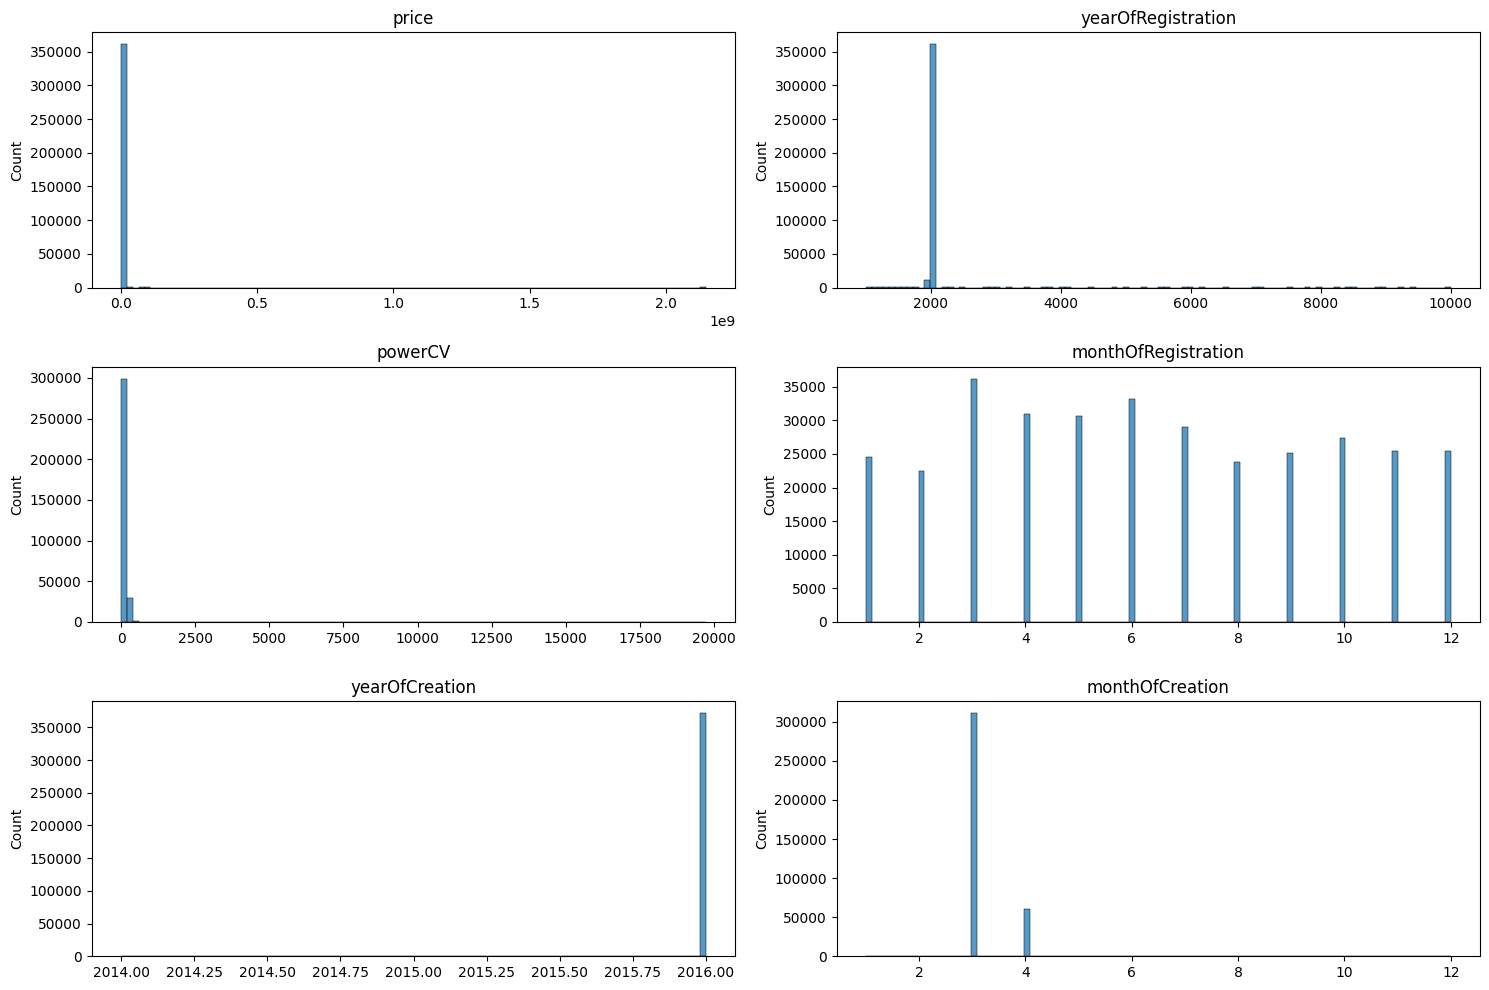

In [ ]:
# Visualizamos las columnas numericas
sp.plot_numericas(df)

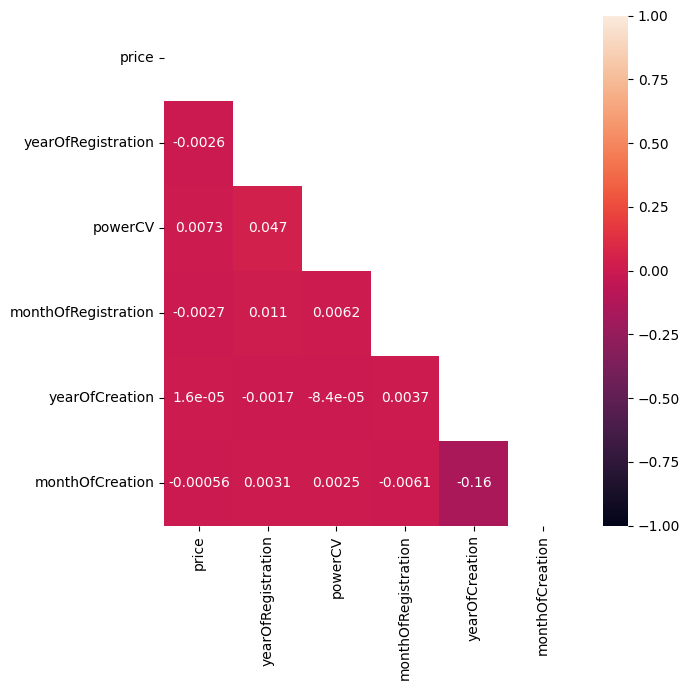

In [ ]:
# Comprobamos la correlación
sp.matriz_correlacion(df)

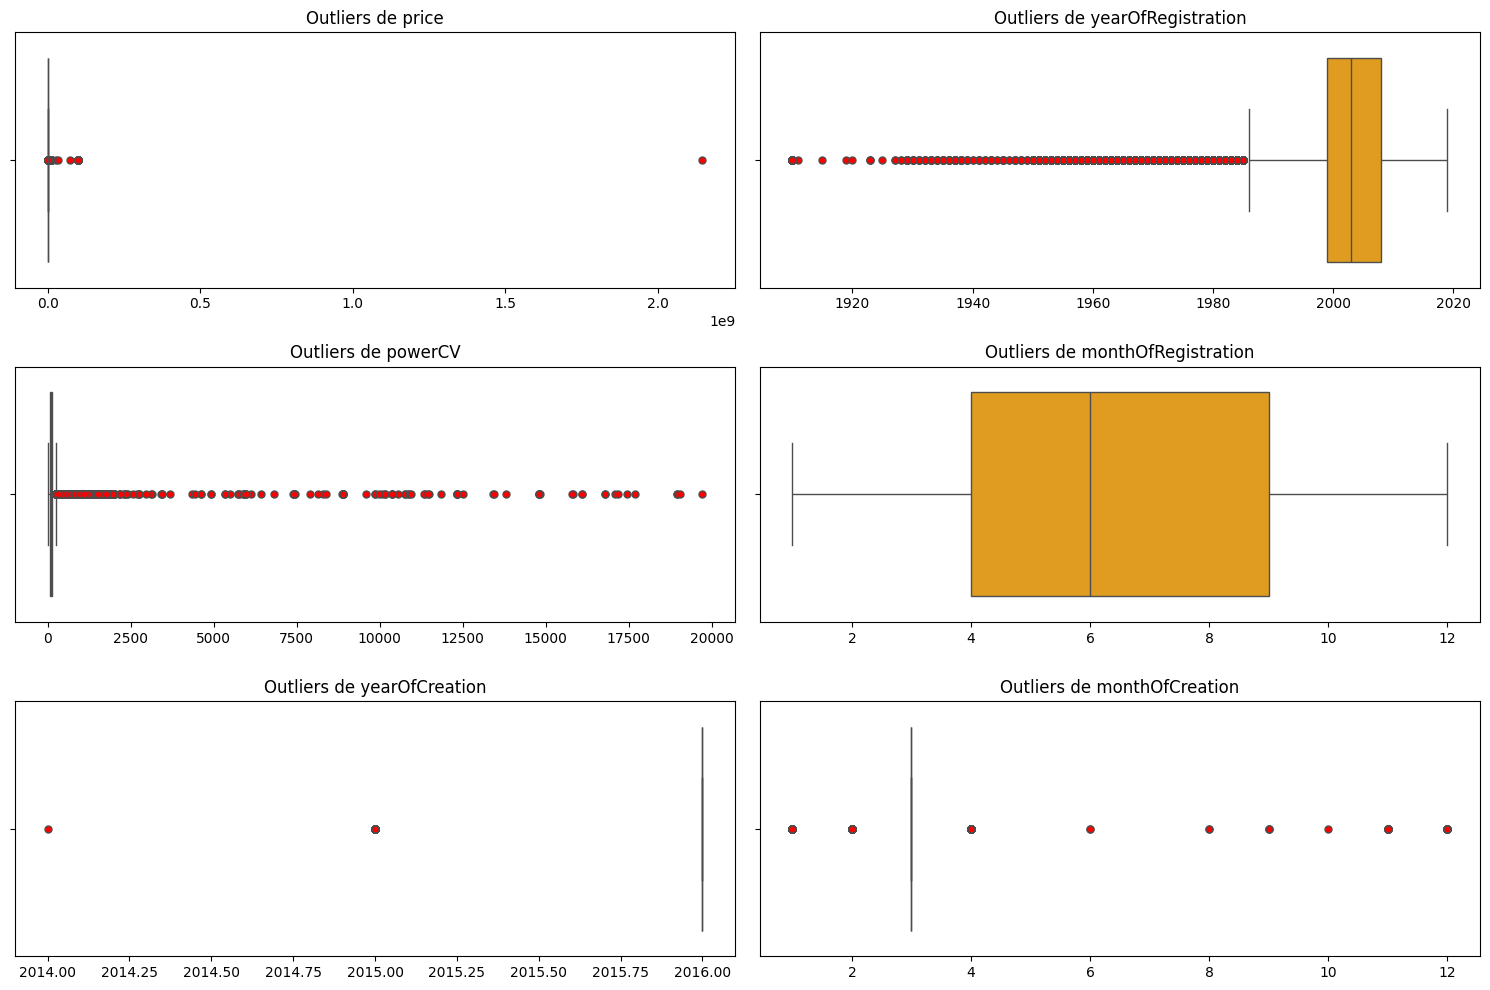

In [ ]:
# Comprobamos los outliers
sp.detectar_outliers(df)

### Gestión de datos erroneos
-    Pasamos los valores considerados erroneos a NaN de las siguientes columnas teniendo en cuenta lo siguiente:
        - yearOfRegistration: a partir de 2025 en adelante y menos de 1900 porque no puede ser que esten registrados en estos años.
        - powerCV: Haciendo una busqueda rápida no existen vehiculos de menos de 8 CV a la venta y de más de 1500 CV se consideran coches exoticos que solo se venden a clientes muy exclusivos.
        - price: Haciendo una busqueda rápida no existen coches de menos de 100€ y de más de 50 millones no existen coches de colección por encima de ese precio. Exceptuando un coche de colección que solo existen 2 unidades que están valoradas en 146 millones de euros.

In [ ]:
# Columna yearOfRegistraation
df_year_ilog = (df["yearOfRegistration"] < 1900) | (df["yearOfRegistration"] >= 2025)
df.loc[df[df_year_ilog].index, "yearOfRegistration"] = np.nan

In [ ]:
# Columna powerCV
df_cv_ilog = (df["powerCV"] < 10) | (df["powerCV"] >= 1500)
df.loc[df[df_cv_ilog].index, "powerCV"] = np.nan

In [ ]:
# Columna price
df_price_ilog = (df["price"] < 100) | (df["price"] >= 50000000)
df.loc[df[df_price_ilog].index, "price"] = np.nan

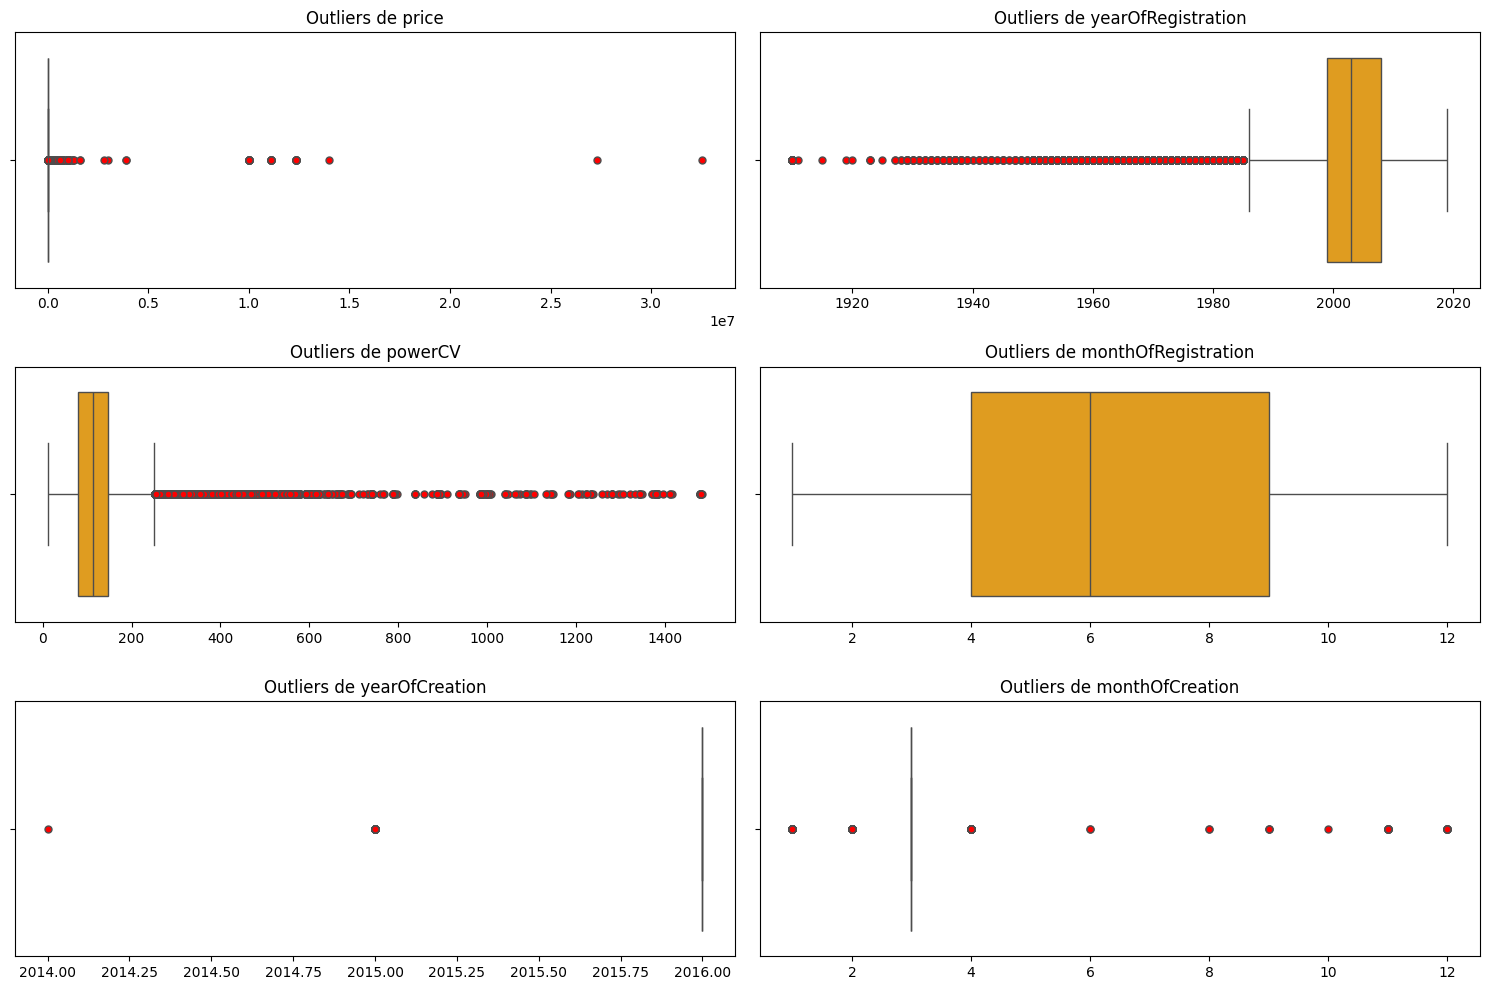

In [ ]:
# Comprobamos de nuevo los outliers para ver los cambios
sp.detectar_outliers(df)

c:\Bravo\Hackio\Modulo7\labs\enunciados\laboratorio-modulo7-leccion01-eda-nulos\../..\src\soporte_preprocesamiento.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = columna,
c:\Bravo\Hackio\Modulo7\labs\enunciados\laboratorio-modulo7-leccion01-eda-nulos\../..\src\soporte_preprocesamiento.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = columna,
c:\Bravo\Hackio\Modulo7\labs\enunciados\laboratorio-modulo7-leccion01-eda-nulos\../..\src\soporte_preprocesamiento.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = columna,
c:\Bravo\Hackio\Modulo7\labs\enunciados\laboratorio-modulo7-leccion01-eda-nulos\../..\src\soporte_preprocesamiento.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = columna,


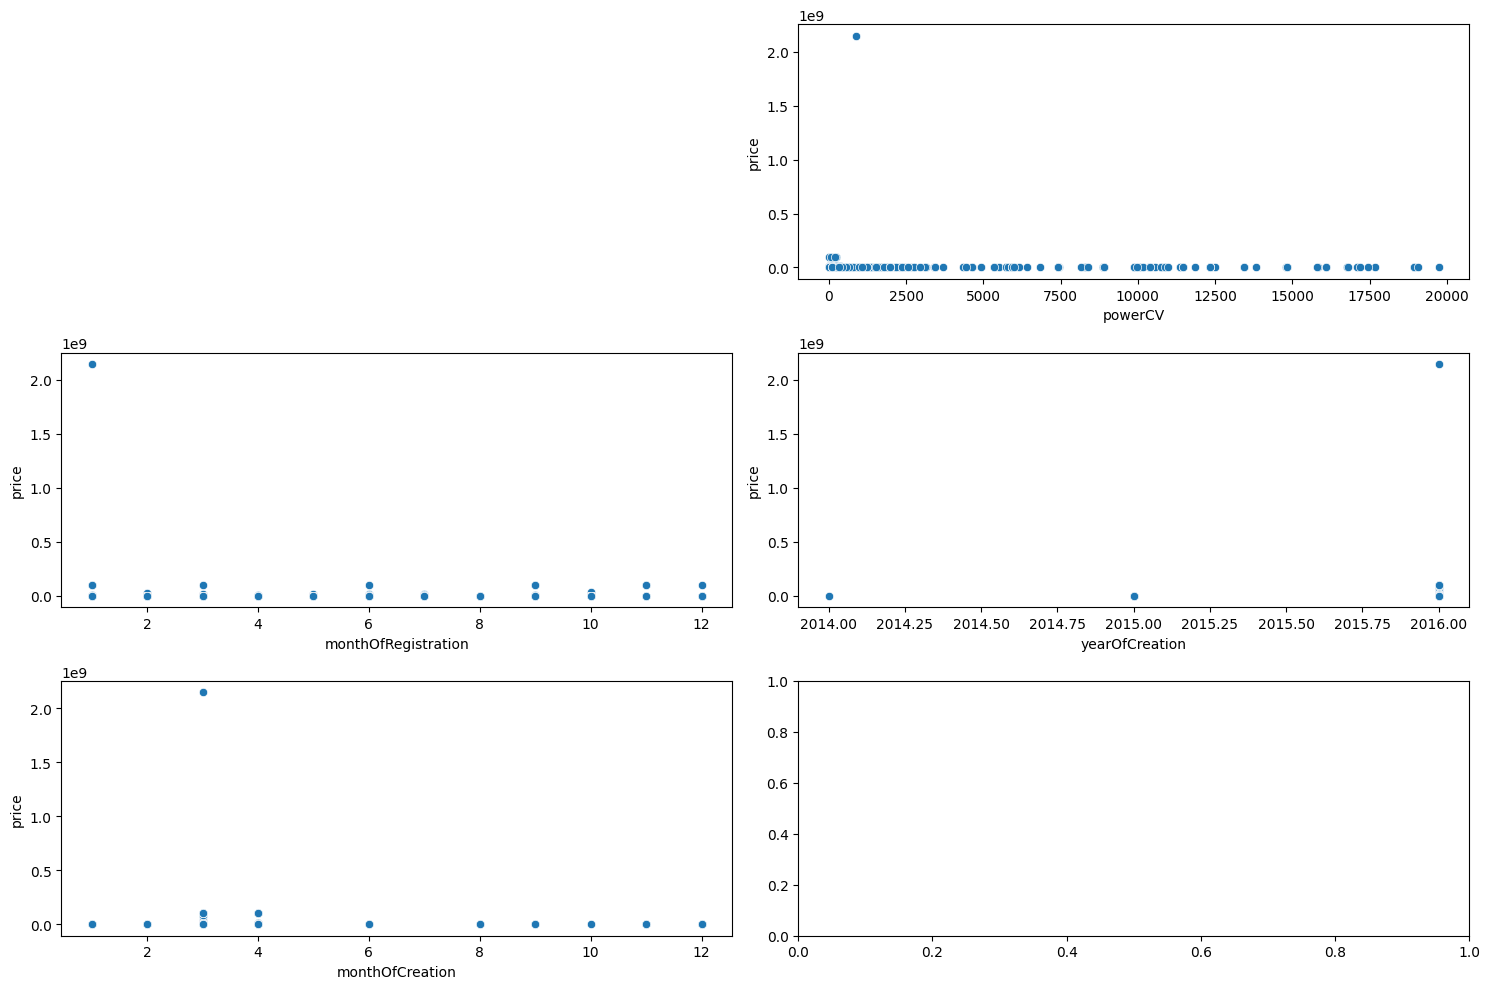

In [19]:
sp.relacion_vr_numericas(df, "price")

In [30]:
# Miramos el numero de nulos en las categoricas
df_cat = sp.separar_dataframe(df)[1]
df_cat.isnull().sum()

name                      0
seller                    0
offerType                 0
abtest                    0
vehicleType          133763
gearbox               20209
model                 20484
kilometer                 0
fuelType              33386
brand                     0
notRepairedDamage     72060
postalCode                0
dtype: int64

In [ ]:
# Reemplazamos en las columnas categoricas que contienen los nulos
df["vehicleType"].fillna("desconocido", inplace=True)
df["gearbox"].fillna("desconocido", inplace=True)
df["model"].fillna("desconocido", inplace=True)
df["fuelType"].fillna("desconocido", inplace=True)
df["notRepairedDamage"].fillna("desconocido", inplace=True)

# Gestión de valores nulos

In [ ]:
# Utilizando KNN
imputer_knn = KNNImputer(n_neighbors=5) 
df_num = sp.separar_dataframe(df)[0] # 0 - Numericas; 1 - Categoricas
knn_imputado = imputer_knn.fit_transform(df_num)
df_num_sin_nulos = pd.DataFrame(knn_imputado, columns=df_num.columns)
df_knn = df.copy()
df_knn[df_num.columns] = df_num_sin_nulos
df_knn.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,371524,2016-03-21 13:30:30.336384512,2016-03-05 14:06:22,2016-03-13 12:51:46.500000,2016-03-21 18:36:22,2016-03-29 14:49:31.249999872,2016-04-07 14:36:58,NaN
price,371520.0,7330.045238,100.0,1250.0,3000.0,7350.0,32545461.0,126946.464404
yearOfRegistration,371520.0,2003.347289,1910.0,1999.0,2003.0,2008.0,2019.0,7.775982
powerCV,371520.0,127.194325,11.0,82.0,114.0,148.0,1485.0,70.59628
monthOfRegistration,371520.0,6.348231,1.0,4.0,6.0,9.0,12.0,3.211967
dateCreated,371524,2016-03-20 19:42:50.398682624,2014-03-10 00:00:00,2016-03-13 00:00:00,2016-03-21 00:00:00,2016-03-29 00:00:00,2016-04-07 00:00:00,NaN
lastSeen,371524,2016-03-30 03:37:56.511738112,2016-03-05 14:15:08,2016-03-23 11:36:06.750000128,2016-04-03 23:17:18,2016-04-06 10:45:02,2016-04-07 14:58:51,NaN
yearOfCreation,371520.0,2015.999917,2014.0,2016.0,2016.0,2016.0,2016.0,0.009424
monthOfCreation,371520.0,3.160974,1.0,3.0,3.0,3.0,12.0,0.377479


In [ ]:
# Lo guardamos en un csv
df_knn.to_csv("../../datos/df_final_knn.csv")

In [ ]:
# Utilizando Iterative
imputer_iterative = IterativeImputer(initial_strategy="median")
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns=df_num.columns)
df_iterative = df.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative
df_iterative.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,371524,2016-03-21 13:30:30.336384512,2016-03-05 14:06:22,2016-03-13 12:51:46.500000,2016-03-21 18:36:22,2016-03-29 14:49:31.249999872,2016-04-07 14:36:58,NaN
price,371520.0,7238.969259,-7644.313508,1300.0,3200.0,7500.0,32545461.0,126257.497948
yearOfRegistration,371520.0,2003.348916,1910.0,1999.0,2003.0,2008.0,2029.980033,7.775559
powerCV,371520.0,124.439775,-1.569417,85.0,115.747723,148.0,1485.0,61.582753
monthOfRegistration,371520.0,6.379839,1.0,4.0,6.324253,9.0,12.0,3.173595
dateCreated,371524,2016-03-20 19:42:50.398682624,2014-03-10 00:00:00,2016-03-13 00:00:00,2016-03-21 00:00:00,2016-03-29 00:00:00,2016-04-07 00:00:00,NaN
lastSeen,371524,2016-03-30 03:37:56.511738112,2016-03-05 14:15:08,2016-03-23 11:36:06.750000128,2016-04-03 23:17:18,2016-04-06 10:45:02,2016-04-07 14:58:51,NaN
yearOfCreation,371520.0,2015.999917,2014.0,2016.0,2016.0,2016.0,2016.0,0.009424
monthOfCreation,371520.0,3.160974,1.0,3.0,3.0,3.0,12.0,0.377479


In [ ]:
# Lo guardamos en un csv
df_iterative.to_csv("../../datos/df_final_iterative.csv")

# Conclusión final

Considero que la mejor opción es el primer DataFrame(df_knn) porque no contiene valores negativos. Podemos destacar diferencias claras en el segundo dataframe dentro de las columnas **powerCV** y **price**. Vemos que contiene valores negativos dentro del valor minimo y esto es poco logico en la realidad.